# **DEPRESSION**
 **Depression** is a common but serious mental health condition that affects how individuals think, feel, and function in daily life. It can lead to emotional and physical problems, and in severe cases, even suicidal thoughts. Among various social classes and demographics, students—especially in secondary and tertiary institutions—are increasingly vulnerable to depression due to academic pressure, social expectations, poor coping mechanisms, and inadequate support systems.

Understanding the patterns and predictors of depression among **students** is critical. It helps in designing timely interventions, shaping school mental health policies, and promoting emotional well-being.
This data analysis, identifies key risk factors and target support efforts to the most affected groups, ultimately fostering a healthier learning environment.

DATASET - https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset


In [ ]:
#import the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [ ]:
#Load the dataset
Depression_data = pd.read_csv('/content/drive/MyDrive/student_depression_dataset.csv')


In [ ]:
Depression_data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
Depression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
Depression_data.duplicated().sum()

np.int64(0)

In [ ]:
Depression_data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000




* Age Ranges from 18-::59 years, with the mean age of ~26 years.
* Majority of respondents are in their early 20s (25% quartile = 21, 75% = 30), typical of **college/university students** or early professionals.
* The CGPA has a maximum value of 10, averaging at 7.66




In [ ]:
Depression_data.rename(columns={'Have you ever had suicidal thoughts ?': 'Suicidal',
                                'Family History of Mental Illness':'Mental Illness'}, inplace=True)

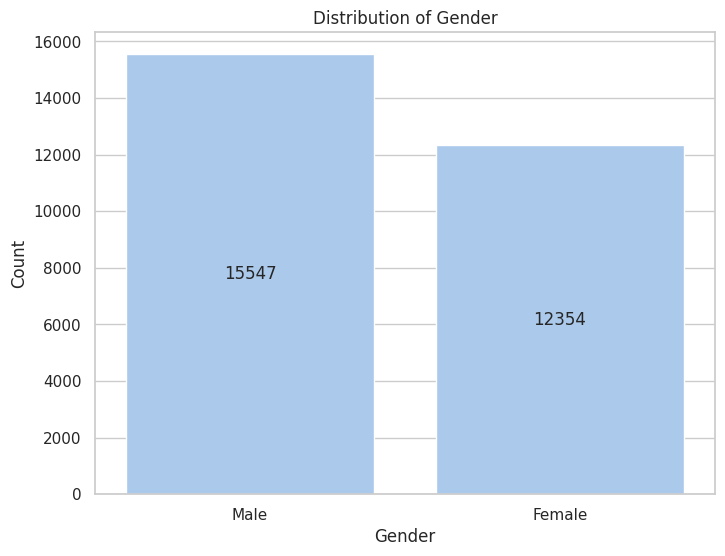

In [ ]:
sns.set(style="whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=Depression_data, x='Gender')
ax.set_title('Distribution of Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')

In [ ]:
	Depression_data['Profession'].value_counts()

,count
Profession,
Student,27870
Architect,8
Teacher,6
'Digital Marketer',3
Chef,2
'Content Writer',2
Pharmacist,2
Doctor,2
'UX/UI Designer',1


The Majority of our target professions are **Students**

Since **Depression** is our major focus for this analysis, lets identify potential **numeric** predictors of Depression from the dataset.

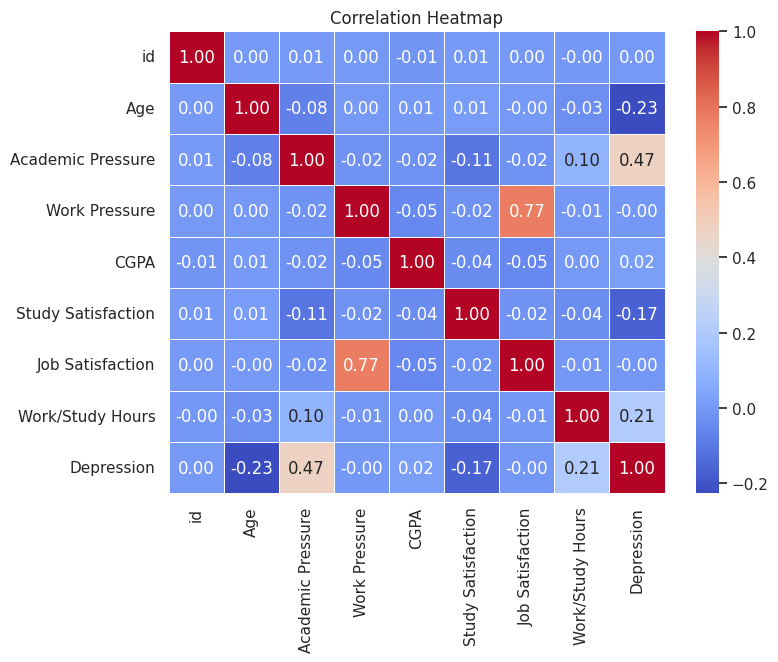

Potential correlations with Depression:

Academic Pressure     0.474835
Age                  -0.226422
Work/Study Hours      0.208563
Study Satisfaction   -0.167971
CGPA                  0.022210
Job Satisfaction     -0.003482
Work Pressure        -0.003351
id                    0.000923
Name: Depression, dtype: float64


In [ ]:
# correlation matrix
corr_Dep = Depression_data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_Dep, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Filter correlations with 'Depression'
depression_corr = corr_Dep['Depression'].drop('Depression').sort_values(key=abs, ascending=False)

# Top correlations
print("Potential correlations with Depression:\n")
print(depression_corr)


From the result above,


*   Academic Pressure and Work/Study Hours are the Major factors that contribute to Depression.
*   While, Study Satisfaction contribute the least.




Investigate the relation of Depression to the categorical data

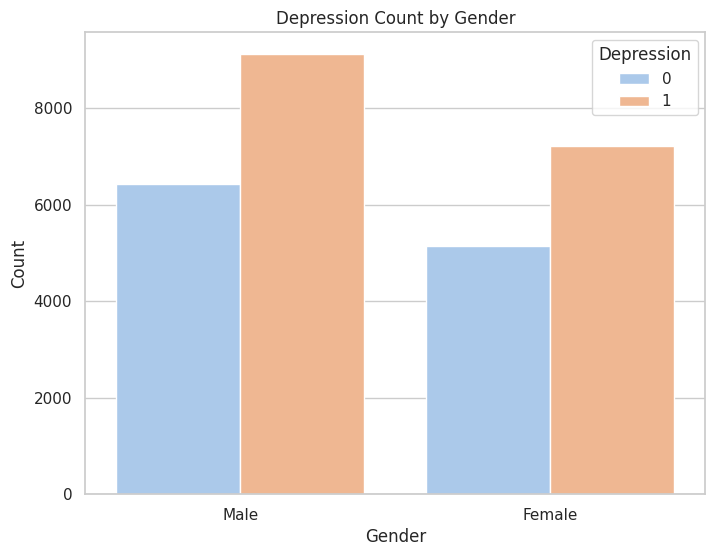

In [ ]:
# Bar Plot - Gender vs. Depression
plt.figure(figsize=(8, 6))

sns.countplot(data=Depression_data, x='Gender', hue='Depression')
plt.title('Depression Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Depression')
plt.show()


Depression is Prominent amongst the **Male** gender than the Female

In [ ]:
Depression_data.groupby('Depression')['Dietary Habits'].value_counts().unstack().fillna(0)

Dietary Habits,Healthy,Moderate,Others,Unhealthy
Depression,,,,
0,4178,4363,4,3020
1,3473,5558,8,7297


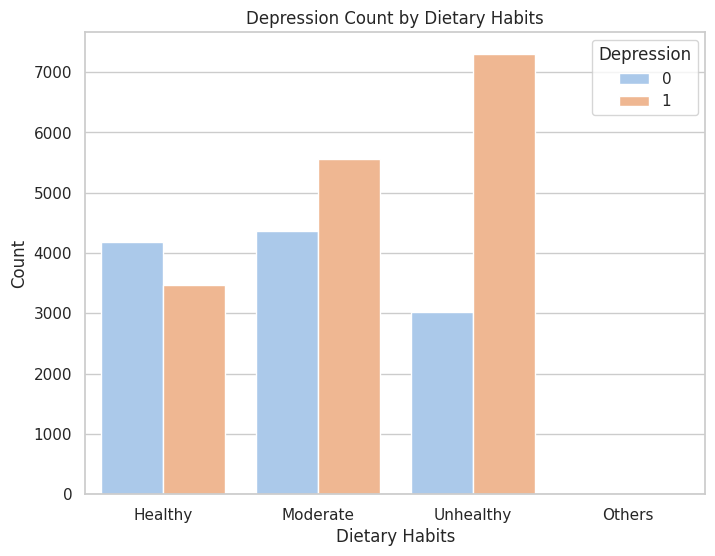

In [ ]:
# Dietary Habits vs. Depression
plt.figure(figsize=(8, 6))

sns.countplot(data=Depression_data, x='Dietary Habits', hue='Depression')
plt.title('Depression Count by Dietary Habits')
plt.xlabel('Dietary Habits')
plt.ylabel('Count')
plt.legend(title='Depression')
plt.show()




*  Individuals with unhealthy dietary habits appear to exhibit higher rates of depression in the data.
*   However, it remains unclear whether poor diet contributes directly to depression, or if other factors mediate this relationship.






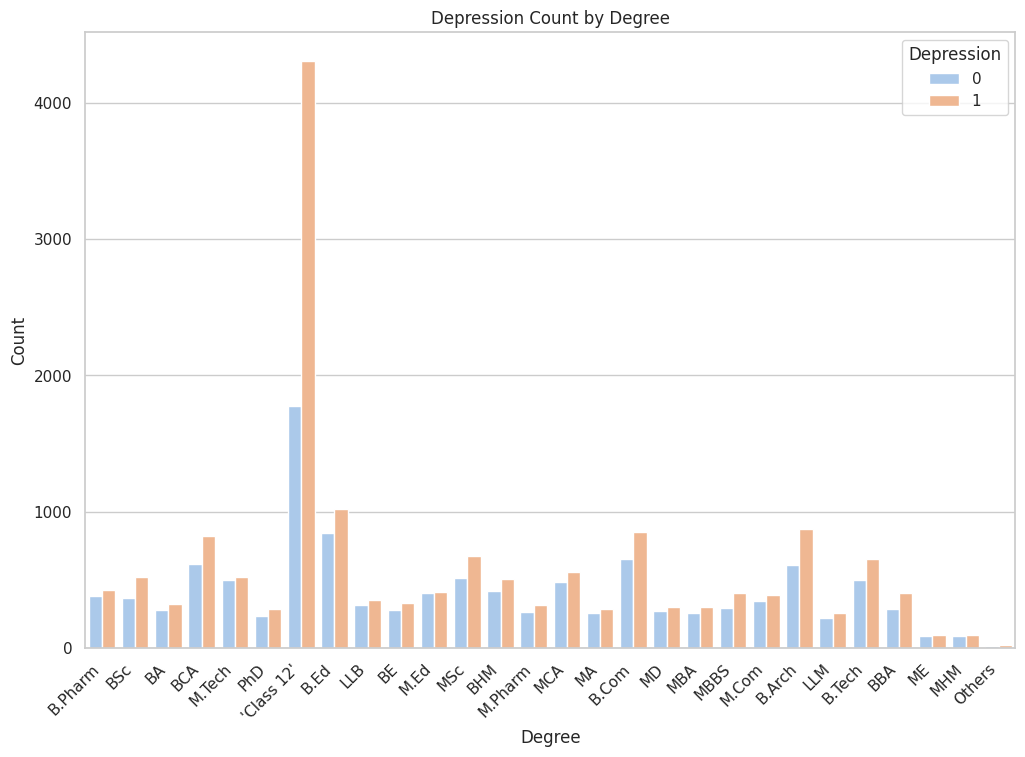

In [ ]:
# Degree vs. Depression
plt.figure(figsize=(12, 8))

sns.countplot(data=Depression_data, x='Degree', hue='Depression')
plt.title('Depression Count by Degree')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.legend(title='Depression')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.show()



*   **‘Class 12’** Holders has a significantly higher count of individuals **"4303"** reporting depression compared to all other degree categories.
*   The spike in depression cases among “Class 12” holders could suggest a correlation between lower education levels and depression vulnerability. However, correlation is not causation.
*   Although, while they are not as significant as Class 12 Degree holder, B.Ed, B.Com, B.Tech, BBA, M.Sc, BCA show considerable depression levels.
*   Degrees like B.Ed, B.Com, and BCA may involve competitive job markets or financial stress, potentially contributing to depression.



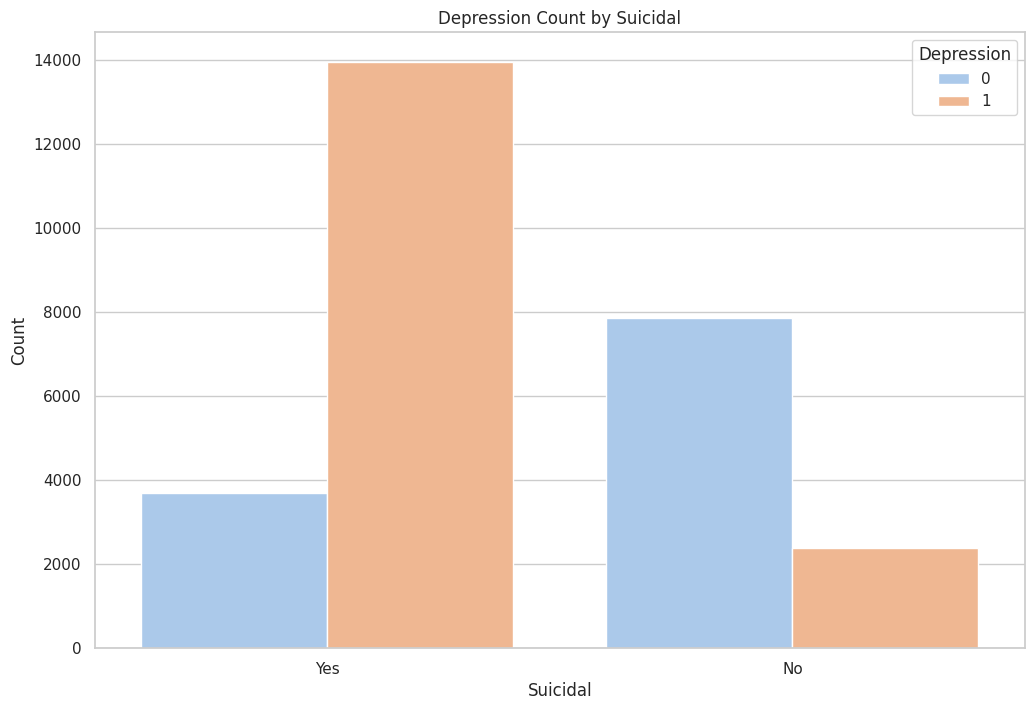

In [ ]:
# Degree vs. Suicidal
plt.figure(figsize=(12, 8))

sns.countplot(data=Depression_data, x='Suicidal', hue='Depression')
plt.title('Depression Count by Suicidal')
plt.xlabel('Suicidal')
plt.ylabel('Count')
plt.legend(title='Depression')




*   The number of people with depression (1) is significantly higher than those without depression (0). Which means, Suicidal ideation appears to be a major indicator or symptom of depression in this dataset.
*   However, the number of people without depression (0) is greater than those with depression. This indicates that individuals not experiencing suicidal thoughts are less likely to be depressed.



In [ ]:
Depression_data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal,Work/Study Hours,Financial Stress,Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


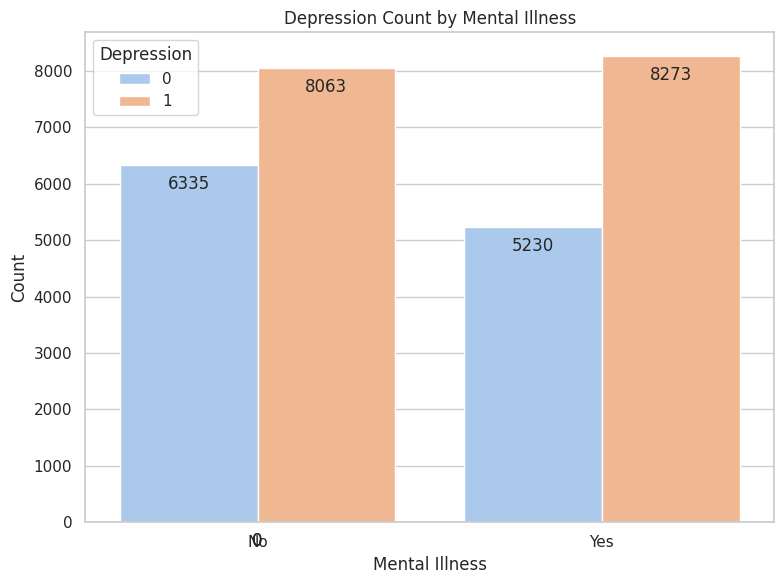

In [ ]:
plt.figure(figsize=(8, 6))

# Plot
ax = sns.countplot(data=Depression_data, x='Mental Illness', hue='Depression')
plt.title('Depression Count by Mental Illness')
plt.xlabel('Mental Illness')
plt.ylabel('Count')
plt.legend(title='Depression')

# Add bar labels
for p in ax.patches:
    height = p.get_height()
    ax.text( p.get_x() + p.get_width() / 2, height - 500, f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


*  For individuals with some form of mental illness, a higher proportion also experience depression (8273) compared to those who do not (5230). This suggests a strong correlation between having a mental illness and experiencing depression.
* However, among individuals without any mental illness, there are still a significant number who experience depression (8063), indicating that depression can exist independently of other mental illnesses.
*   The data shows that while depression is significantly associated with mental illness, it is not exclusive to individuals with mental illness




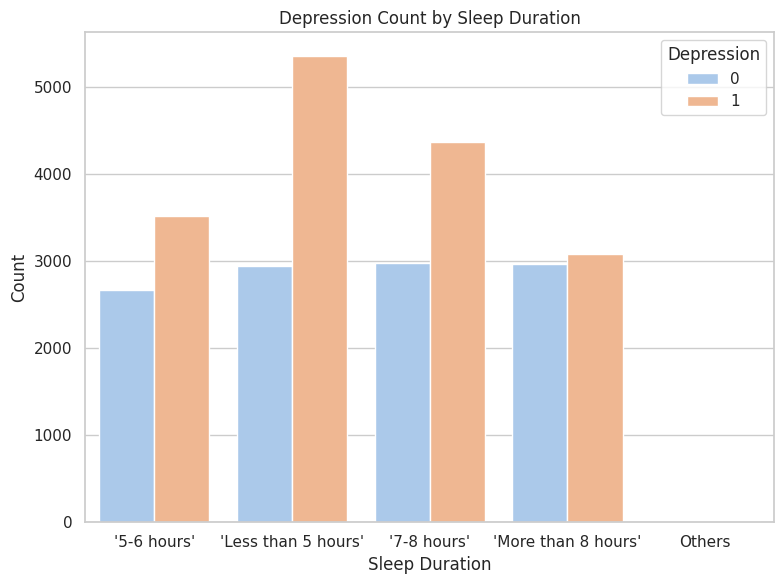

In [ ]:
plt.figure(figsize=(8, 6))

# Plot
ax = sns.countplot(data=Depression_data, x='Sleep Duration', hue='Depression')
plt.title('Depression Count by Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.legend(title='Depression')

plt.tight_layout()
plt.show()



* Individuals with less sleep (5-6 hours and less than 5 hours) generally see more depression cases compared to those with adequate or excessive sleep.
* Those with no depression are more evenly distributed across sleep durations, which contrasts sharply with the concentrated high depression cases among short-sleeping groups.
* The data suggests a "U-shaped" relationship between sleep duration and depression, where both insufficient sleep and excessive sleep are correlated with higher depression cases, with 7-8 hours being the ideal range.
* Efforts to improve sleep hygiene (Sleeping at the right time) might reduce depression prevalence.



In [ ]:
Depression_data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal,Work/Study Hours,Financial Stress,Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


There are some categorical columns that be converted to numerical to investigate their correlation with the target column

In [ ]:
from sklearn.preprocessing import LabelEncoder

# create a copy of the dataset
D_data = Depression_data.copy()

# convert categorical column to numerical
le = LabelEncoder()
categorical_cols = ['Mental Illness', 'Suicidal', 'Gender', 'Sleep Duration', 'Dietary Habits']
for col in categorical_cols:
    D_data[col] = le.fit_transform(D_data[col])



In [ ]:
D_data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal,Work/Study Hours,Financial Stress,Mental Illness,Depression
0,2,1,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,0,0,B.Pharm,1,3.0,1.0,0,1
1,8,0,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,0,1,BSc,0,3.0,2.0,1,0
2,26,1,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,2,0,BA,0,9.0,1.0,1,0
3,30,0,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,1,1,BCA,1,4.0,5.0,1,1
4,32,0,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,0,1,M.Tech,1,1.0,1.0,0,0


In [ ]:
# correlation matrix
corr_Dep = D_data.corr(numeric_only=True)

# Filter correlations with 'Depression'
depression_corr = corr_Dep['Depression'].drop('Depression').sort_values(key=abs, ascending=False)

# Top correlations
print("Potential correlations with Depression:\n")
print(depression_corr)

Potential correlations with Depression:

Suicidal              0.546277
Academic Pressure     0.474835
Age                  -0.226422
Work/Study Hours      0.208563
Dietary Habits        0.206605
Study Satisfaction   -0.167971
Mental Illness        0.053430
Sleep Duration       -0.022411
CGPA                  0.022210
Job Satisfaction     -0.003482
Work Pressure        -0.003351
Gender                0.001794
id                    0.000923
Name: Depression, dtype: float64


* Turns out Suicidal has a very strong correlation with Depression.
* Suicidal, Academic Pressure and Work/Study Hours are important factors worth considering.

## **Machine Learning Model Building**

In [ ]:
# import some necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Select only numerical columns for X and drop the target column
X = D_data.drop(columns=['Depression', 'id'], errors='ignore')
X = X.select_dtypes(include=['int64', 'float64'])

y = D_data['Depression']


In [ ]:
# Split dataset into Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#Train the machine learning model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#model evaluation
y_pred = model.predict(X_test)

print("Random Forest Classification Report:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Random Forest Classification Report:
Accuracy: 0.8107865973839814
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      2343
           1       0.83      0.86      0.84      3238

    accuracy                           0.81      5581
   macro avg       0.81      0.80      0.80      5581
weighted avg       0.81      0.81      0.81      5581

Confusion Matrix:
 [[1756  587]
 [ 469 2769]]


## **Try other Machine learning Models**

In [ ]:
# Use other machine learning models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [ ]:
accuracy_results = {}
for name, modelz in models.items():
    modelz.fit(X_train, y_train)
    y_pred = modelz.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_results[name] = accuracy

In [ ]:
# Display accuracy results
for model, acc in accuracy_results.items():
    print(f"{model}: {acc:.2f}%")

Logistic Regression: 81.81%
SVM: 81.26%
KNN: 79.72%
Gradient Boosting: 82.17%


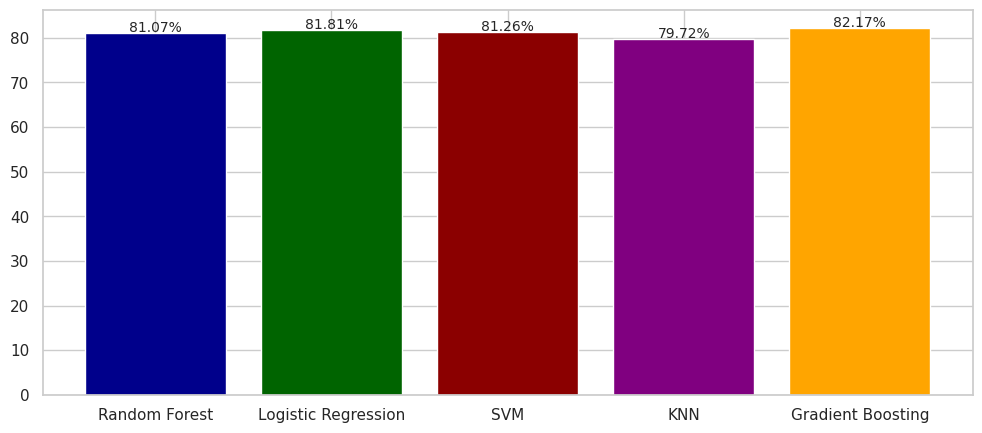

In [ ]:
models = ['Random Forest', 'Logistic Regression', 'SVM', 'KNN', 'Gradient Boosting']
accuracy = [81.07, 81.81, 81.26, 79.72, 82.17]

# Creating the bar plot
plt.figure(figsize=(12, 5))
plt.bar(models, accuracy, color=['darkblue', 'darkgreen', 'darkred', 'purple', 'orange'])

for i, v in enumerate(accuracy):
    plt.text(i, v + 0.3, f"{v:.2f}%", ha='center', fontsize=10)

plt.show()


## **Insight**
*  Given the above result, amongst the machine learning models tested to predict depression, Gradient Boosting delivered the highest accuracy at 82.17%, followed closely by Logistic Regression and SVM.
* These results suggest that the dataset is well-suited for classification and that tree-based and linear models can both capture relevant patterns. For optimal performance, Gradient Boosting is recommended, though Logistic Regression offers a more interpretable alternative with comparable accuracy.



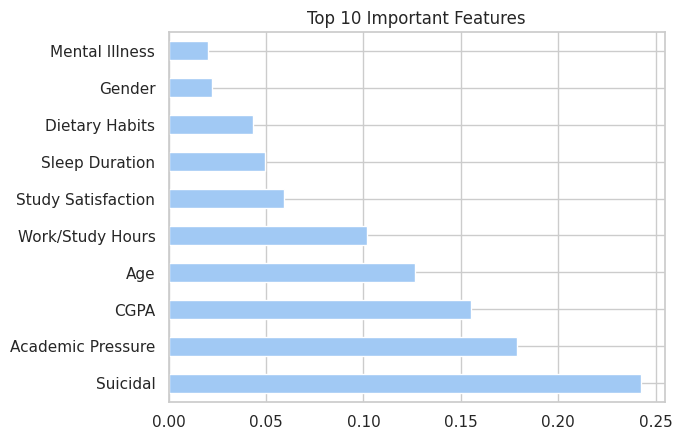

In [ ]:
# the Features that contributed to the model decision
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


**Feature importance and correlation suggest that:**
*  Suicidal tendencies, academic pressure, and work/study hours are key predictors.
*  Some weakly or negatively correlated features still show up as important — this happens because tree-based models capture complex, non-linear interactions that correlation alone doesn’t.